In [1]:
from lrcb.bandits.multirep_finite import make_random_rep, fix_rank, hls_rank, rank, FiniteMultiBandit, derank
from lrcb.bandits.finite_linear_bandits import FiniteLinearBandit
from lrcb.algos.oful import oful
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lrcb.visualization.notebook_utils as nu

os.chdir('../logs')

In [2]:
nc = 20
na = 5
dim = 10
seeds = [1, 2, 3, 4, 5]

In [3]:
r0 = make_random_rep(nc, na, dim)
hls_rank(r0)


10

In [4]:
reps = [derank(r0, i) for i in range(1, dim)]
reps.append(r0)

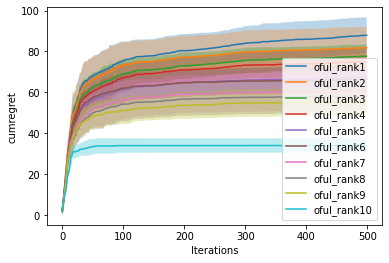

In [5]:
iterations = 500
reg = 0.01
noise = 0.5
delta = 0.2
param_bound = math.sqrt(2)

problem = FiniteMultiBandit(nc, na, reps)

names = []
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d' % hls_rank(reps[i])
    names.append(name)
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

nu.compare('../logs', names, 'cumregret', seeds)